In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import joblib

## Loading the data 

In [2]:
df = pd.read_csv("medical-charges.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Data understanding and EDA

In [3]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Axes: xlabel='age', ylabel='charges'>

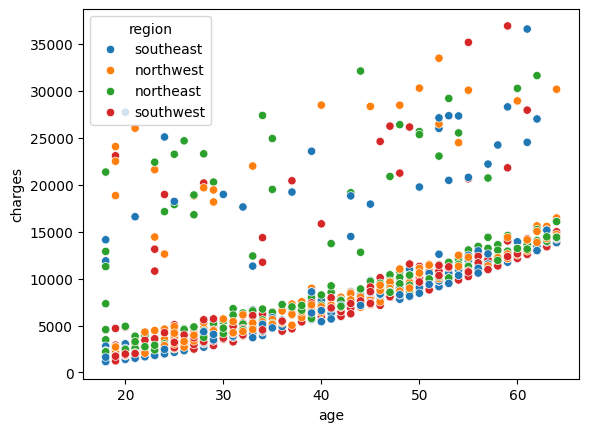

In [4]:
sns.scatterplot(
    data=df[(df['smoker']=='no')],
    x='age',
    y='charges',
    hue="region"
)

In [5]:
df = df[(df['smoker']=='no')][['age','charges']]

<Axes: >

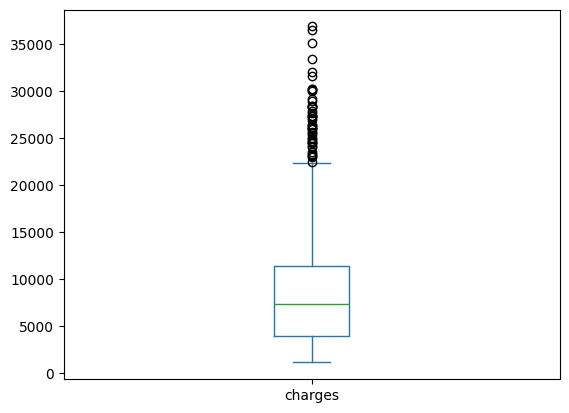

In [6]:
df['charges'].plot(kind='box')

In [7]:
df.corr()

,age,charges
age,1.000000,0.627947
charges,0.627947,1.000000


<Axes: xlabel='age', ylabel='charges'>

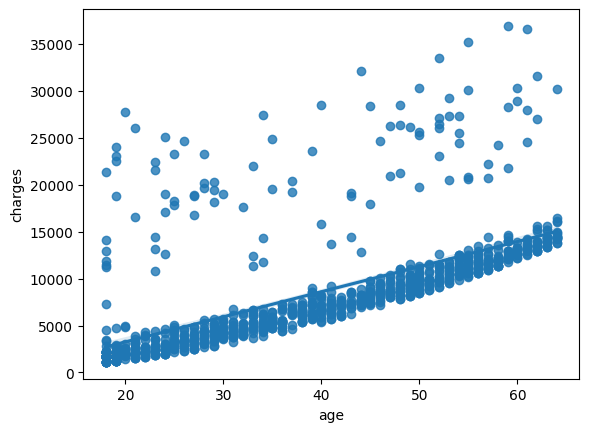

In [8]:
sns.regplot(data=df,x="age",y='charges')

In [9]:
df

,age,charges
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
5,31,3756.62160
...,...,...
1332,52,11411.68500
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350


In [10]:
x = df['age']
y = df['charges']

In [11]:
x

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [12]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [13]:
scaler = sk.preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(pd.DataFrame(x))

In [19]:
reg_model = sk.linear_model.LinearRegression().fit(scaled_x,y)

In [56]:
pred = reg_model.predict(scaled_x)

In [61]:
sk.metrics.root_mean_squared_error(pred,y)

4662.505766636395